In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get notebook and parent dir
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)

# Set path to pedophysics module 
pedophysics_code_path = os.path.join(parent_dir)
sys.path.insert(0, pedophysics_code_path)

# Import Pedophysics module
from pedophysics.simulate import Soil
from pedophysics import predict
from pedophysics.predict import *
from pedophysics.pedophysical_models.bulk_ec import Fu, Rhoades, LongmireSmithEC
from pedophysics.pedophysical_models.bulk_perm import Hilhorst
# from pedophysics.pedophysical_models.water_perm import MalmbergMaryott, Olhoeft
from pedophysics.pedophysical_models.water import *
from pedophysics.pedotransfer_functions.particle_density import *
from pedophysics.utils.similar_arrays import arrays_are_similar

# Set pandas display option
pd.set_option('max_colwidth', None)


## Figure 3 and 4

In [2]:

sample1 = Soil(water = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
               porosity = 0.4)

sample1.water
sample1.porosity
sample1.water_ec
sample1.df

,temperature,water,salinity,sand,silt,clay,porosity,bulk_density,particle_density,CEC,...,bulk_ec_tc,bulk_ec_dc,bulk_ec_dc_tc,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,NaN,0.10,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.15,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.20,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.25,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.30,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.40,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Figure 10

sample2_water [0.11  0.167 0.19    nan 0.211 0.249]
sample2.info.water 0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
Name: water, dtype: object
sample2.info.bulk_ec 0    Value given by the user
1    Value given by the user
2    Value given by the user
3                        NaN
4    Value given by the user
5    Value given by the user
Name: bulk_ec, dtype: object


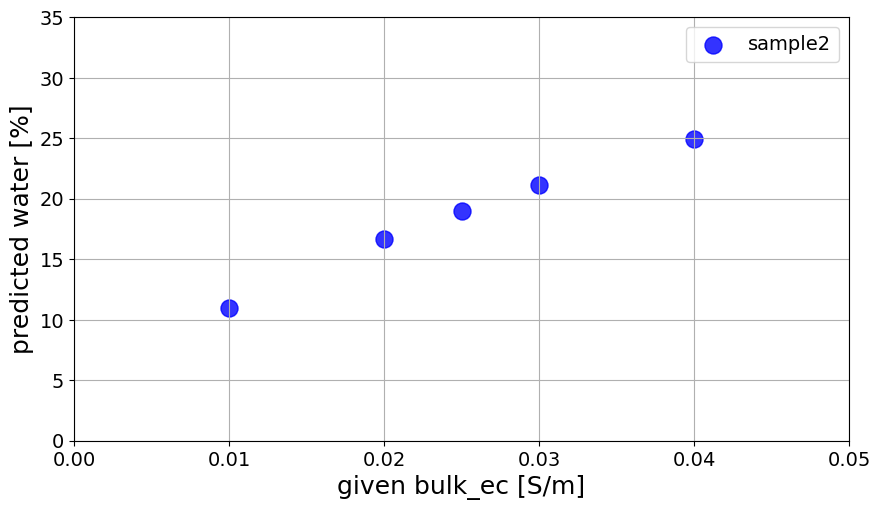

In [3]:
sample2 = Soil( bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = 10,
                porosity = 0.4,
                water_ec = 0.5)

sample2_water = predict.Water(sample2) 
print('sample2_water', sample2_water)
print('sample2.info.water', sample2.info.water)
print('sample2.info.bulk_ec', sample2.info.bulk_ec)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)
ss=150
ax.scatter(sample2.bulk_ec, sample2_water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex2')
plt.show()

sample3_water [0.107 0.172 0.185   nan 0.197 0.257]


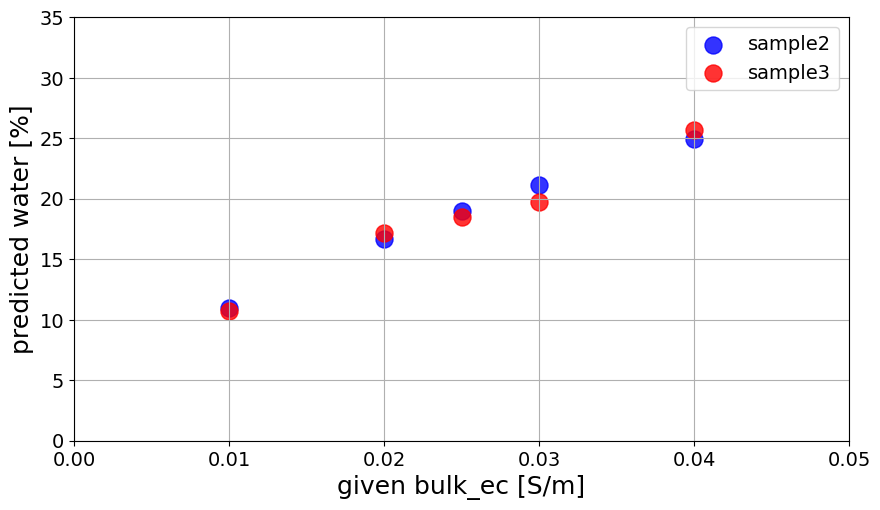

In [4]:
sample3 = Soil(bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = [11, 8, 12, 10, 15, 7],
                porosity = 0.4,
                water_ec = 0.5)

sample3_water = predict.Water(sample3) 
print('sample3_water', sample3_water)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.scatter(sample2.bulk_ec, sample2.df.water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.scatter(sample3.bulk_ec, sample3.df.water*100, color='red', alpha=0.8, s=ss, label = "sample3")

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True)  
ax.legend(loc='upper right', fontsize = 14)


plt.savefig('Ex3')
plt.show()

sample4_bulk_perm [ 2.795  6.358  7.535  3.31   4.242 10.383 12.667]
sample4.info.bulk_perm 0    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
1    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
2    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
3    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
4    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
5    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
6    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
Name: bulk_perm, dtype: object
sample4.water_perm [nan nan nan nan nan nan nan]
sample4.df.water_perm.values [80 80 80 80 80 80 80]
sample4.df.porosity.values [0.491 0.491 0.491 0.491 0.491 0.491 0.491]
sample4.porosity [nan nan nan nan nan nan nan]
sample4.info.porosity[0] Calculated based on bulk density


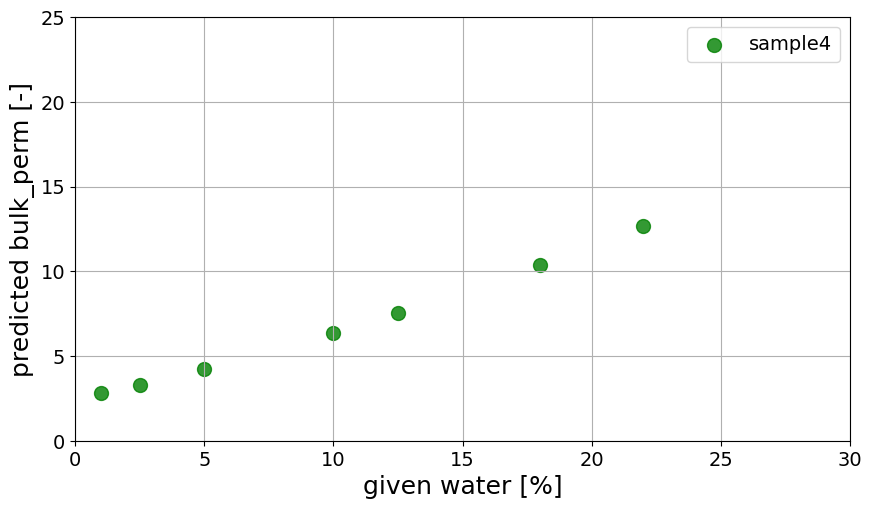

In [5]:
sample4 = Soil( water = [0.01, 0.1, 0.125, 0.025, 0.05, 0.18, 0.22],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

sample4_bulk_perm = predict.BulkPerm(sample4) 
print('sample4_bulk_perm', sample4_bulk_perm)
print('sample4.info.bulk_perm', sample4.info.bulk_perm)
print('sample4.water_perm', sample4.water_perm)
print('sample4.df.water_perm.values', sample4.df.water_perm.values)
print('sample4.df.porosity.values', sample4.df.porosity.values)
print('sample4.porosity', sample4.porosity)
print('sample4.info.porosity[0]', sample4.info.porosity[0])

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)
ss=100
ax.scatter(sample4.water*100, sample4_bulk_perm, color='green', alpha=0.8, s=ss, label = "sample4")
ax.set_xlim(0, 30)
ax.set_ylim(0, 25)
ax.set_xlabel('given water [%]', fontsize = 18)
ax.set_ylabel('predicted bulk_perm [-]', fontsize = 18)
ax.grid(True)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)


plt.savefig('Ex4')
plt.show()

sample4b_bulk_perm [12.     4.5    7.     3.669  8.003  9.434  4.284  5.413 12.829 15.468]
sample4b.info.bulk_perm 0                                                                                                              Value given by the user
1                                                                                                              Value given by the user
2                                                                                                              Value given by the user
3    nan--> Calculated by fitting (R2=0.986) WunderlichP function in predict.bulk_perm.fitting, for soil.water values between[0, 0.24]
4    nan--> Calculated by fitting (R2=0.986) WunderlichP function in predict.bulk_perm.fitting, for soil.water values between[0, 0.24]
5    nan--> Calculated by fitting (R2=0.986) WunderlichP function in predict.bulk_perm.fitting, for soil.water values between[0, 0.24]
6    nan--> Calculated by fitting (R2=0.986) WunderlichP function in predic

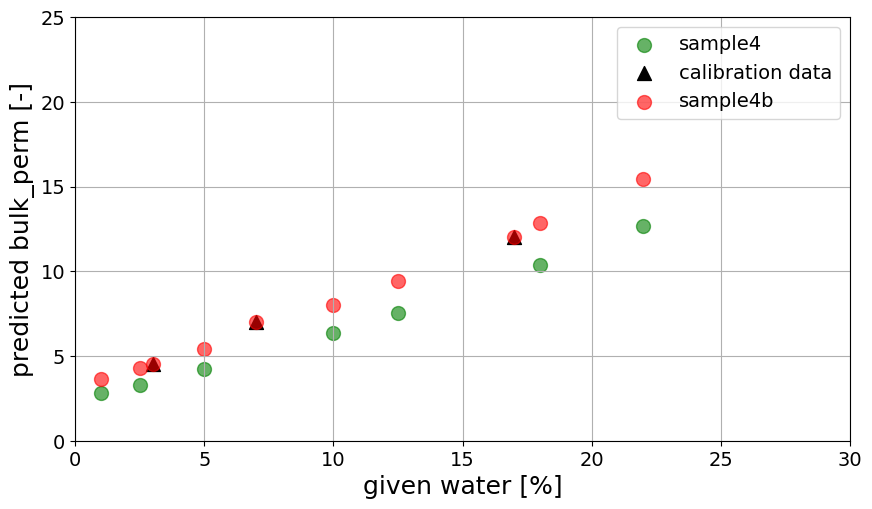

In [6]:
sample4b = Soil(water = [0.17, 0.03, 0.07, 0.01, 0.1, 0.125, 0.025, 0.05, 0.18, 0.22],
                bulk_perm = [12, 4.5, 7],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

sample4b_bulk_perm = predict.BulkPerm(sample4b) 
print('sample4b_bulk_perm', sample4b_bulk_perm)
print('sample4b.info.bulk_perm', sample4b.info.bulk_perm)

####################################################### PLOT ############################################

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
fig2.set_figheight(5.5)
fig2.set_figwidth(10)

ax2.scatter(sample4.water*100, sample4.df.bulk_perm, color='green', alpha=0.6, s=100, label = "sample4")
ax2.scatter(sample4b.water*100, sample4b.bulk_perm, color='black', marker ="^", alpha=1, s=ss, label = "calibration data")
ax2.scatter(sample4b.df.water*100, sample4b_bulk_perm, color='red', alpha=0.6, s=ss, label = "sample4b")

ax2.set_xlim(0, 30)
ax2.set_ylim(0, 25)
ax2.set_xlabel('given water [%]', fontsize = 18)
ax2.set_ylabel('predicted bulk_perm [-]', fontsize = 18)
ax2.grid(True)
ax2.tick_params(axis='y', labelsize=14) 
ax2.tick_params(axis='x', labelsize=14) 
ax2.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex4b')
plt.show()

sample5_water [0.15  0.182 0.109 0.142 0.042 0.136 0.167 0.092 0.11  0.054]
sample5.info.water 0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
6    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
7    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
8    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
9    nan--> Calculated using Fu 

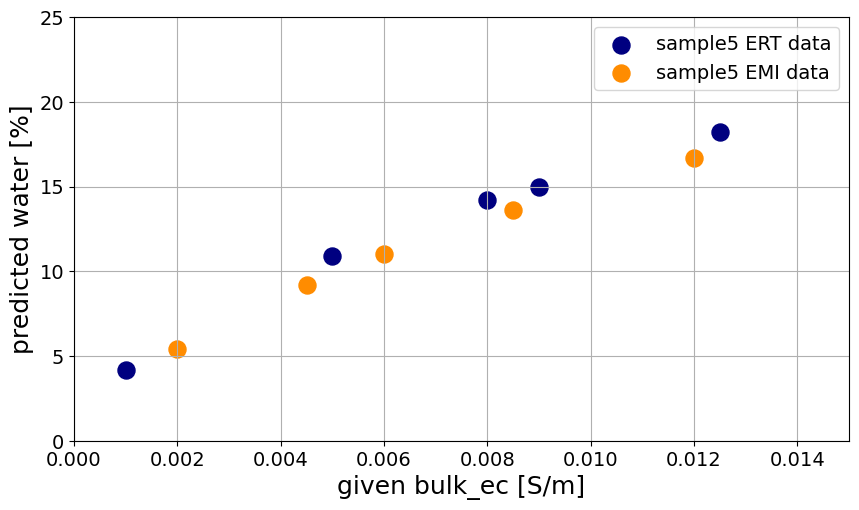

In [7]:
sample5 = Soil( 
    bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 0.0085, 0.012, 0.0045, 0.006, 0.002],
    frequency_ec = [0, 0, 0, 0, 0, 50e3, 50e3, 50e3, 50e3, 50e3],
    texture = 'Sand', bulk_density= 1.5, water_ec = 0.3)

sample5_water = predict.Water(sample5) 
print('sample5_water', sample5_water)
print('sample5.info.water', sample5.info.water)
print('sample5.info.bulk_ec_dc_tc[6]', sample5.info.bulk_ec_dc_tc[6])
print('sample5.info.bulk_ec_dc[6]', sample5.info.bulk_ec_dc[6])

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample5.bulk_ec[:5], sample5_water[:5]*100, color='navy', alpha=1, s=ss, label = "sample5 ERT data")
ax.scatter(sample5.bulk_ec[5:], sample5_water[5:]*100, color='darkorange', alpha=1, s=ss, label = "sample5 EMI data")
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.set_ylim(0, 25)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex5')
plt.show()

sample5b_water [0.17  0.21  0.115 0.156 0.041 0.148 0.189 0.097 0.117 0.056]
sample5b.info.water 0                                                                                                                            Value given by the user
1                                                                                                                            Value given by the user
2                                                                                                                            Value given by the user
3    nan--> Calculated by fitting (R2=0.999) WunderlichEC function in predict.water_from_ec.fitting, for soil.bulk_ec values between: [0.001, 0.016]
4    nan--> Calculated by fitting (R2=0.999) WunderlichEC function in predict.water_from_ec.fitting, for soil.bulk_ec values between: [0.001, 0.016]
5    nan--> Calculated by fitting (R2=0.999) WunderlichEC function in predict.water_from_ec.fitting, for soil.bulk_ec values between: [0.001, 0.016]
6    nan-

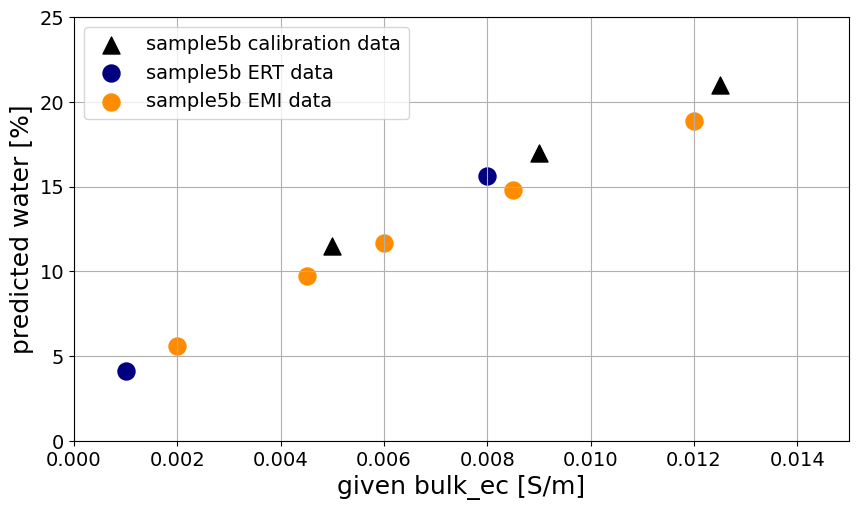

In [8]:
sample5b = Soil( 
    bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 0.0085, 0.012, 0.0045, 0.006, 0.002],
    water = [0.17, 0.21, 0.115],
    frequency_ec = [0, 0, 0, 0, 0, 50e3, 50e3, 50e3, 50e3, 50e3],
    texture = 'Sand', bulk_density= 1.5)

sample5b_water = predict.Water(sample5b) 
print('sample5b_water', sample5b_water)
print('sample5b.info.water', sample5b.info.water)
print('sample5b.df.water_ec.values', sample5b.df.water_ec.values)
print('sample5b.info.water_ec[0]', sample5b.info.water_ec[0])

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample5b.bulk_ec[:3], sample5b.water[:3]*100, marker = "^", color='black', alpha=1, s=ss, label = "sample5b calibration data")
ax.scatter(sample5b.bulk_ec[3:5], sample5b_water[3:5]*100, color='navy', alpha=1, s=ss, label = "sample5b ERT data")
ax.scatter(sample5b.bulk_ec[5:], sample5b_water[5:]*100, color='darkorange', alpha=1, s=ss, label = "sample5b EMI data")
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.set_ylim(0, 25)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper left', fontsize = 14)

plt.savefig('Ex5b')
plt.show()

sample6_water_ec [0.289855 0.289855 0.289855 0.289855 0.289855]
sample6.info.water_ec 0    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
1    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
2    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
3    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
4    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
Name: water_ec, dtype: object


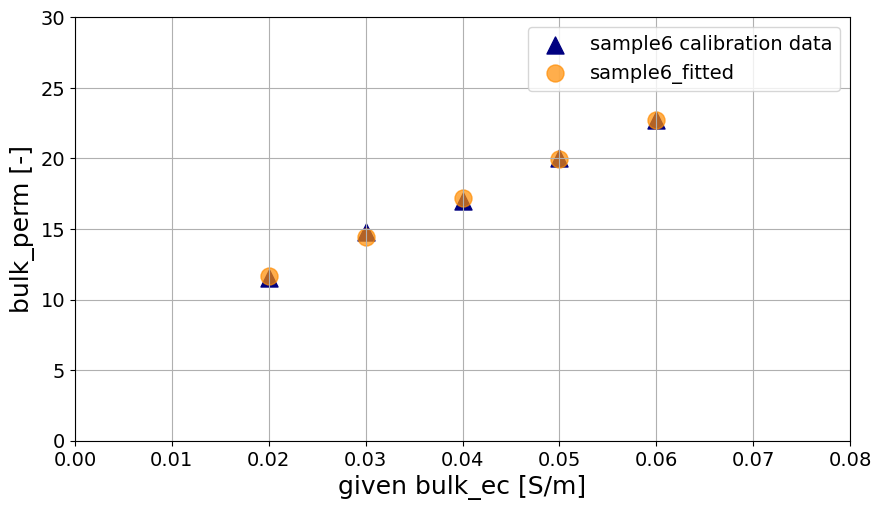

In [9]:
sample6 = Soil(bulk_ec = [0.02, 0.03, 0.04, 0.05, 0.06], 
                bulk_perm = [11.5, 14.8, 17, 20, 22.7],
                clay=5,
                porosity=1.48,
                instrument='TDR')

sample6_water_ec = predict.WaterEC(sample6)
print('sample6_water_ec', sample6_water_ec)
print('sample6.info.water_ec', sample6.info.water_ec)
sample6_fitted = Hilhorst(sample6.df.bulk_ec, sample6.df.water_ec, sample6.df.water_perm, sample6.df.offset_perm)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample6.bulk_ec, sample6.bulk_perm, marker = "^", color='navy', alpha=1, s=ss, label = "sample6 calibration data")
ax.scatter(sample6.bulk_ec, sample6_fitted, color='darkorange', alpha=0.7, s=ss, label = "sample6_fitted")
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.set_ylim(0, 30)
ax.set_xlim(0, 80e-3)
ax.grid(True)
ax.set_ylabel('bulk_perm [-]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex6')
plt.show()

[0.00549 0.00549 0.00549 0.00549 0.00549 0.00549]
0    Calculated using SenGood function in predict.Salinity
1    Calculated using SenGood function in predict.Salinity
2    Calculated using SenGood function in predict.Salinity
3    Calculated using SenGood function in predict.Salinity
4    Calculated using SenGood function in predict.Salinity
5    Calculated using SenGood function in predict.Salinity
Name: salinity, dtype: object
[0.06539 0.06539 0.06539 0.06539 0.06539 0.06539]
0    nan--> Calculated by fitting (R2 = 0.999) Rhoades function in predict.water_ec.fitting_rhoades
1    nan--> Calculated by fitting (R2 = 0.999) Rhoades function in predict.water_ec.fitting_rhoades
2    nan--> Calculated by fitting (R2 = 0.999) Rhoades function in predict.water_ec.fitting_rhoades
3    nan--> Calculated by fitting (R2 = 0.999) Rhoades function in predict.water_ec.fitting_rhoades
4    nan--> Calculated by fitting (R2 = 0.999) Rhoades function in predict.water_ec.fitting_rhoades
5    nan--> Calc

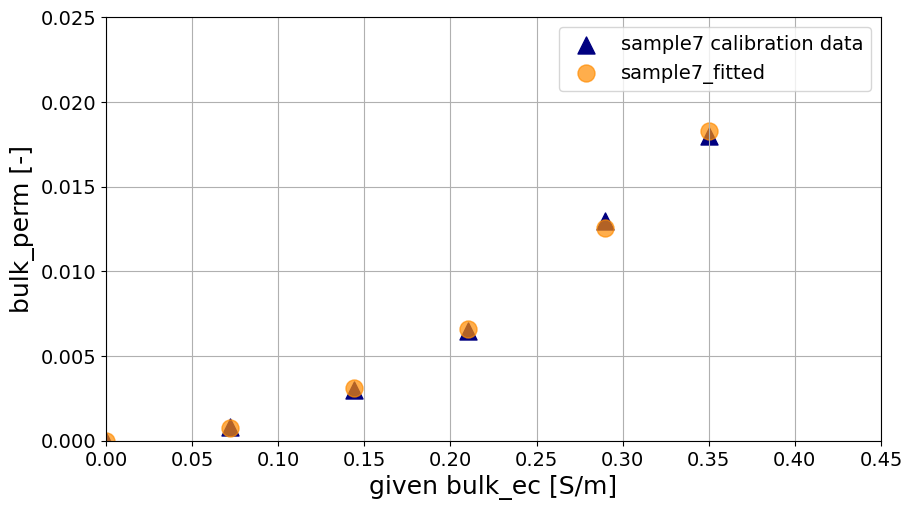

In [10]:
sample7 = Soil(bulk_ec = [0, 8e-4, 3e-3, 6.5e-3, 1.3e-2, 1.8e-2],
                water = [0, 0.072, 0.144, 0.21, 0.29, 0.35],
                clay=5, bulk_density=1.48, instrument = 'TDR')

sample7_salinity = predict.Salinity(sample7)
print(sample7_salinity)
print(sample7.info.salinity)
print(sample7.df.water_ec.values)
print(sample7.info.water_ec)
sample7_fitted = Rhoades(sample7.df.water, sample7.df.water_ec, sample7.df.s_ec, sample7.E, sample7.F)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample7.water, sample7.bulk_ec, marker = "^", color='navy', alpha=1, s=ss, label = "sample7 calibration data")
ax.scatter(sample7.water, sample7_fitted, color='darkorange', alpha=0.7, s=ss, label = "sample7_fitted")
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.set_ylim(0, 0.025)
ax.set_xlim(0, 0.45)
ax.grid(True)
ax.set_ylabel('bulk_perm [-]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex7')
plt.show()

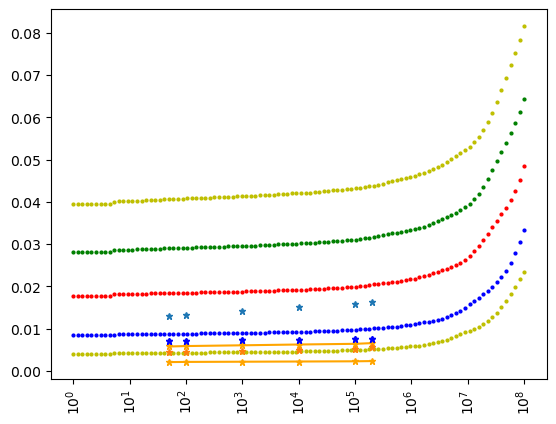

In [11]:
sample11g = Soil(water = [0.1], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkEC(sample11g)
LS2 = predict.BulkEC(sample12g)
LS3 = predict.BulkEC(sample13g)
LS4 = predict.BulkEC(sample14g)
LS5 = predict.BulkEC(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(0, 8, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(0, 8, 9), rotation='vertical')  # Set label locations.

plt.show()

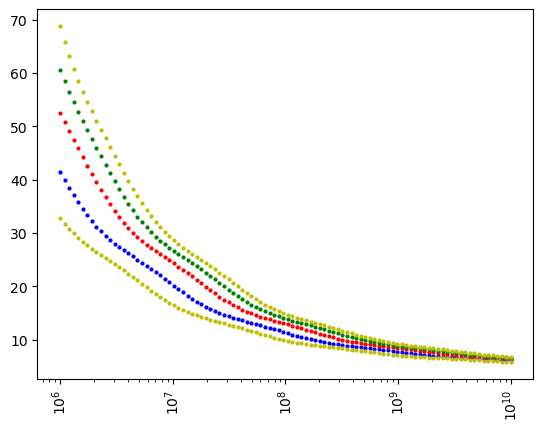

In [12]:
sample11g = Soil(water = [0.1], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkPerm(sample11g)
LS2 = predict.BulkPerm(sample12g)
LS3 = predict.BulkPerm(sample13g)
LS4 = predict.BulkPerm(sample14g)
LS5 = predict.BulkPerm(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(6, 10, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(6, 10, 5), rotation='vertical')  # Set label locations.

plt.show()

[0.      0.      0.      0.      0.      0.0082  0.01433 0.18315 0.00675
 0.00037]
0    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
1    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
2    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
3    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
4    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
5    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
6    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
7    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
8    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
9    nan--> Equal to soil.df.bulk_ec_dc in predict.bulk_ec.conversion
Name: bulk_ec, dtype: object
0    nan--> Calculated from soil.df.bulk_ec_dc_tc using SheetsHendrickx function in predict.bulk_ec_dc.tc_to_non_tc
1    nan--> Calculated from soil.df.bulk_ec_dc_tc using SheetsHendrickx 

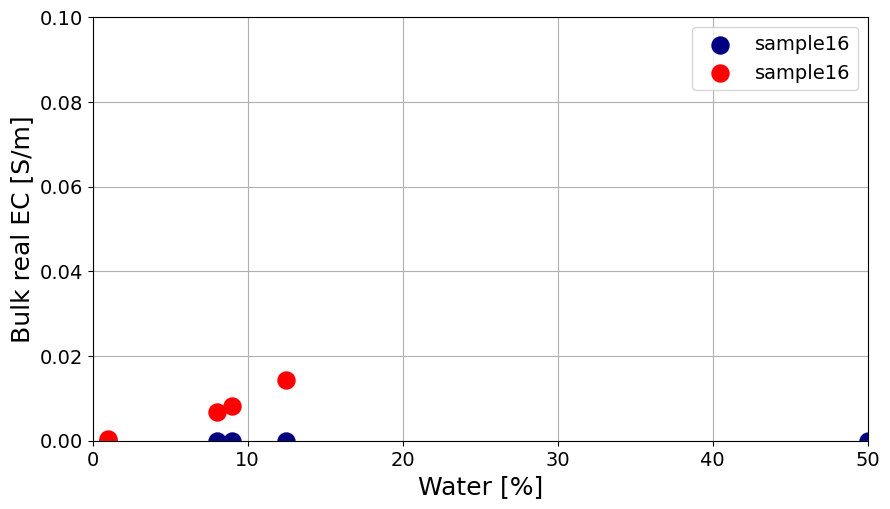

In [13]:
sample16 = Soil( 
    water = [0.09, 0.125, 0.5, 0.08, 0.01, 0.09, 0.125, 0.5, 0.08, 0.01,],
    temperature = [0, 0, 0, 0, 0, 50e3, 50e3, 50e3, 50e3, 50e3],
    texture = 'Sand', bulk_density= 1.5, water_ec = 0.3)

sample16_dctc = predict.BulkEC(sample16) 
print(sample16_dctc)
print(sample16.info.bulk_ec)
print(sample16.info.bulk_ec_dc)
print(sample16.info.bulk_ec_dc_tc)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample16.water[:5]*100, sample16_dctc[:5], color='navy', alpha=1, s=ss, label = "sample16")
ax.scatter(sample16.water[5:]*100, sample16_dctc[5:], color='red', alpha=1, s=ss, label = "sample16")

fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.set_xlim(0, 50)
ax.set_ylim(0, 0.1)
ax.grid(True)
ax.set_xlabel('Water [%]', fontsize = 18)
ax.set_ylabel('Bulk real EC [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex16')
plt.show()